### NN - Part 2b
### Abed Tabbalat

In [1]:
# Mounting drive
import os
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
os.chdir('/content/drive/My Drive/DSC650/Original/dsc650/assignments/assignment06')
!pwd

Mounted at /content/drive
/content/drive/My Drive/DSC650/Original/dsc650/assignments/assignment06


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from keras import layers, models
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

## Importing Data

In [3]:
(trainX, trainy), (testX, testy) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


## Data Prep

In [4]:
# Print the sizes of the data sets
print("Size of train_images:", trainX.shape)
print("Size of test_images:", testX.shape)
print("Size of train_labels:", trainy.shape)
print("Size of test_labels:", testy.shape)

Size of train_images: (50000, 32, 32, 3)
Size of test_images: (10000, 32, 32, 3)
Size of train_labels: (50000, 1)
Size of test_labels: (10000, 1)


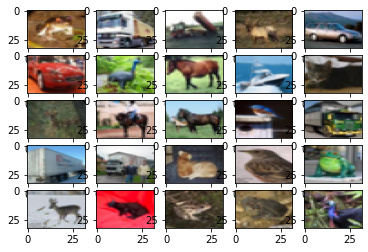

In [5]:
# Assignment classes for visualization
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat',
                   'deer', 'frog', 'horse', 'ship', 'truck']

# Create a new figure and a 5x5 grid of subplots
fig, ax = plt.subplots(5, 5)

# Iterate through the subplots and display the images
image_index = 0
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(trainX[image_index], aspect='auto')
        image_index += 1

# Display the plot
plt.show()


In [6]:
# Normalize the datasets
train_images = trainX.astype('float32') / 255.0
test_images = testX.astype('float32') / 255.0

# Convert labels to numeric
train_labels = to_categorical(trainy)
test_labels = to_categorical(testy)

#Split the data into validation and training sets
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

# Print the shapes of the datasets
print(f'x_val shape: {x_val.shape}') # Shape of the validation set
print(f'y_val shape: {y_val.shape}') # Shape of the validation set labels
print(f'partial_x_train shape: {partial_x_train.shape}') # Shape of the training set
print(f'partial_y_train shape: {partial_y_train.shape}') # Shape of the training set labels

x_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 10)
partial_x_train shape: (40000, 32, 32, 3)
partial_y_train shape: (40000, 10)


## Model

In [7]:
# Instantiate a sequential model
model = Sequential()

# Add first convolutional layer with 32 filters, filter size (3, 3), ReLU activation, 
# He normal initialization, 'same' padding, and input shape of (32, 32, 3)
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))

# Add batch normalization layer after each convolutional layer
model.add(BatchNormalization())

# Add second convolutional layer with 32 filters, filter size (3, 3), ReLU activation, 
# He normal initialization, and 'same' padding
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Add batch normalization layer
model.add(BatchNormalization())

# Add max pooling layer with pool size (2, 2)
model.add(MaxPooling2D((2, 2)))

# Add dropout layer with rate of 0.2
model.add(Dropout(0.2))

# Add third convolutional layer with 64 filters, filter size (3, 3), ReLU activation, 
# He normal initialization, and 'same' padding
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Add batch normalization layer
model.add(BatchNormalization())

# Add fourth convolutional layer with 64 filters, filter size (3, 3), ReLU activation, 
# He normal initialization, and 'same' padding
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Add batch normalization layer
model.add(BatchNormalization())

# Add max pooling layer with pool size (2, 2)
model.add(MaxPooling2D((2, 2)))

# Add dropout layer with rate of 0.3
model.add(Dropout(0.3))

# Add fifth convolutional layer with 128 filters, filter size (3, 3), ReLU activation, 
# He normal initialization, and 'same' padding
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Add batch normalization layer
model.add(BatchNormalization())

# Add sixth convolutional layer with 128 filters, filter size (3, 3), ReLU activation, 
# He normal initialization, and 'same' padding
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Add batch normalization layer
model.add(BatchNormalization())

# Add max pooling layer with pool size (2, 2)
model.add(MaxPooling2D((2, 2)))

# Add dropout layer with rate of 0.4
model.add(Dropout(0.4))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add fully connected layer with 128 units, ReLU activation, and He normal initialization
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

# Add batch normalization layer
model.add(BatchNormalization())

# Add dropout layer with rate of 0.5
model.add(Dropout(0.5))

# Add output layer with 10 units and softmax activation
model.add(Dense(10, activation='softmax'))

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [9]:
# Define stochastic gradient descent optimizer with learning rate of 0.001 and momentum of 0.9
opt = SGD(lr=0.001, momentum=0.9)

# Compile the model with categorical crossentropy loss, stochastic gradient descent optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Create an instance of ImageDataGenerator with width and height shift range of 0.1 and horizontal flip
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# Prepare iterator for training data with a batch size of 64
it_train = datagen.flow(partial_x_train, partial_y_train, batch_size=64)

# Calculate the number of steps for each epoch
steps = int(partial_x_train.shape[0] / 64)

# Train the model on the generated data with 200 epochs, validation data, and verbose output
history = model.fit(it_train, steps_per_epoch=steps, epochs=200, validation_data=(x_val, y_val), verbose=1)

Epoch 1/200
625/625 [==============================] - 27s 41ms/step - loss: 1.5419 - accuracy: 0.4364 - val_loss: 1.4085 - val_accuracy: 0.4892
Epoch 2/200
625/625 [==============================] - 25s 41ms/step - loss: 1.4653 - accuracy: 0.4632 - val_loss: 1.4293 - val_accuracy: 0.4818
Epoch 3/200
625/625 [==============================] - 25s 40ms/step - loss: 1.4100 - accuracy: 0.4855 - val_loss: 1.4305 - val_accuracy: 0.4839
Epoch 4/200
625/625 [==============================] - 25s 40ms/step - loss: 1.3628 - accuracy: 0.5051 - val_loss: 1.3328 - val_accuracy: 0.5146
Epoch 5/200
625/625 [==============================] - 25s 39ms/step - loss: 1.3146 - accuracy: 0.5252 - val_loss: 1.3210 - val_accuracy: 0.5237
Epoch 6/200
625/625 [==============================] - 24s 39ms/step - loss: 1.2751 - accuracy: 0.5395 - val_loss: 1.2618 - val_accuracy: 0.5404
Epoch 7/200
625/625 [==============================] - 25s 40ms/step - loss: 1.2429 - accuracy: 0.5496 - val_loss: 1.3212 - val_ac

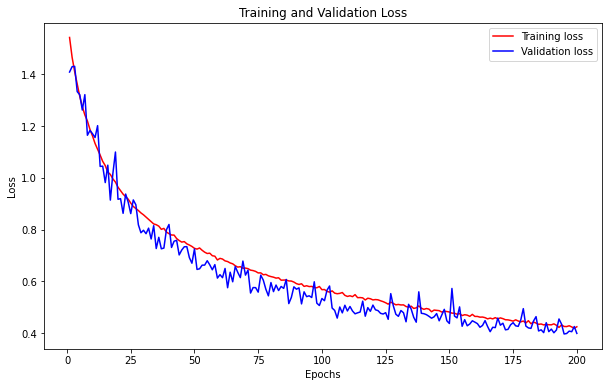

In [10]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Get the loss and validation loss values from the history object
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(loss_values) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

# Set the title, x and y labels, and legend
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Save the plot
fig = plt.gcf()
fig.savefig('results/CIFGAR10/includes/train_val_loss.png')

# Show the plot
plt.show()

<Figure size 432x288 with 0 Axes>

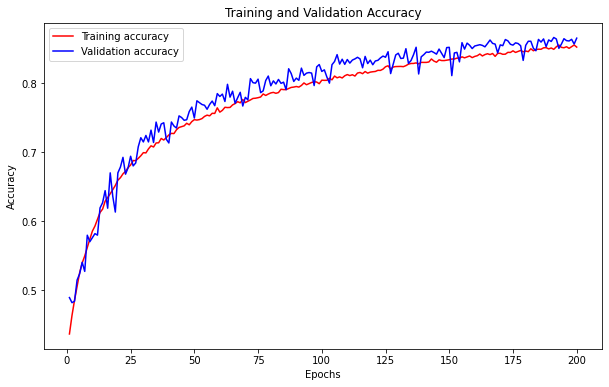

In [11]:
# Clear the current plot
plt.clf()

# Set the figure size
plt.figure(figsize=(10, 6))

# Get the accuracy and validation accuracy values from the history object
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(loss_values) + 1)

# Plot the training and validation accuracy
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')

# Set the title, x and y labels, and legend
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Save the plot
fig = plt.gcf()
fig.savefig('results/CIFGAR10/includes/train_val_accuracy.png')

# Show the plot
plt.show()

In [12]:
# Evaluate the model on the test dataset and get the test loss and accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Print the test accuracy and loss
print(f'Test accuracy: {test_acc * 100:.1f}%')
print(f'Test loss: {test_loss:.3f}')

313/313 [==============================] - 1s 4ms/step - loss: 0.4304 - accuracy: 0.8618
Test accuracy: 86.2%
Test loss: 0.430


In [13]:
# Predict the labels for the test images using the trained model
label_pred_test = model.predict(test_images)

# Get the predicted classes by taking the index of the maximum probability in each row
label_pred_test_classes = np.argmax(label_pred_test, axis=1)

# Get the maximum probability for each predicted class
label_pred_test_max_probability = np.max(label_pred_test, axis=1)

313/313 [==============================] - 1s 3ms/step


In [14]:
# Convert the one-hot encoded test labels back to categorical labels
test_labels = np.argmax(test_labels, axis=1)

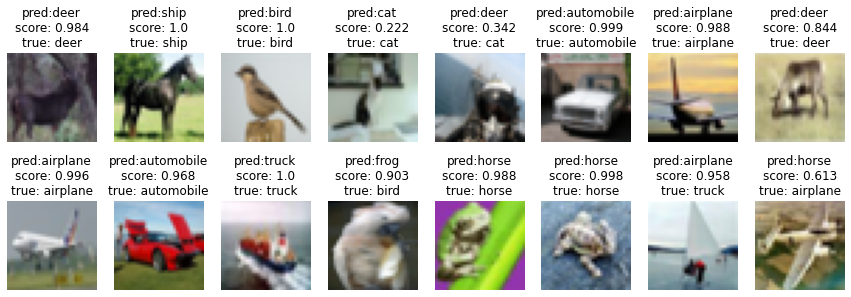

In [18]:
# Set the number of columns and rows for the plot
cols = 8
rows = 2

# Create a new figure with the specified size
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))

# Loop over each column and row in the plot
for i in range(cols):
  for j in range(rows):
    # Get a random index to display an image from the test set
    random_index = np.random.randint(0, len(test_labels))

    # Add a subplot to the figure
    ax = fig.add_subplot(rows, cols, i * rows + j + 1)

    # Turn off the grid and axis labels
    ax.grid('off')
    ax.axis('off')

    # Display the image at the random index
    ax.imshow(test_images[random_index, :])

    # Get the predicted label, predicted probability, and true label for the image
    pred_label = cifar10_classes[label_pred_test_classes[random_index]]
    pred_probability = label_pred_test_max_probability[random_index]
    true_label = cifar10_classes[test_labels[random_index]]

    # Set the title of the subplot with the predicted label, predicted probability, and true label
    ax.set_title(f'pred:{pred_label}\nscore: {pred_probability:.3}\ntrue: {true_label}')

In [19]:
# Save the trained model and its history to a file
model.save('results/CIFGAR10/includes/mnist.h5', history)

# Save the test accuracy, test loss, and training history dictionary to a file using pickle
pickle.dump({'test_accuracy': test_acc, 
             'test_loss': test_loss, 
             'history_dict': history.history},
            open('results/CIFGAR10/includes/training_metrics', 'wb'))